In [57]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times']

In [58]:


## DEFINE STYLE
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

In [59]:
Y_samples = []
dY_samples = []

system = 'VanderPol'
filter_methods = ['ssplines','tikhonov','trendfilter']
n_filters = len(filter_methods)

#Load true dynamical system data
filepath_xt = 'data_files/'+ system + '/' + system + '_dynamics.csv'
dynamics = np.genfromtxt(filepath_xt, delimiter=',')

t = dynamics[0]
data = dynamics[1:]
t_samples = len(t)
trim = int(np.floor(5 / 100 * t_samples))

n_states = int(data.shape[0] / 2)
X = data[0:n_states,trim:-trim]
DX = data[n_states:,trim:-trim]
tt = t[trim:-trim]
tt_samples = len(tt)
n_samples = 100

noise_lvls = [0.0001, 0.001, 0.01, 0.1]
# noise_lvls = [0.001, 0.01, 0.1, 1]

n_noise_lvls = len(noise_lvls)

mean_X_error = np.zeros((n_noise_lvls, n_filters))
mean_dX_error = np.zeros((n_noise_lvls, n_filters))

var_X_error = np.zeros((n_noise_lvls, n_filters))
var_dX_error = np.zeros((n_noise_lvls, n_filters))

error_X = np.zeros((n_samples,n_states,tt_samples))
error_dX = np.zeros((n_samples,n_states,tt_samples))

rel_error_X = np.zeros(n_samples)
rel_error_dX = np.zeros(n_samples)

for filter_idx, filter_method in enumerate(filter_methods):
    
    for noise_lvl, sigma in enumerate(noise_lvls):

        #Load sample observations
        for state in range(n_states):

            filepath_y = 'data_files/' + system + '/' + filter_method + '/' + system + '_' + filter_method + '_' + str(sigma) + '_Y' + str(state+1) + '.csv'
            y = np.genfromtxt(filepath_y, delimiter=',')
            Y_samples.append(y)

            filepath_dy = 'data_files/' + system + '/' + filter_method+ '/' + system + '_' + filter_method + '_' + str(sigma) + '_dY' + str(state+1) + '.csv'
            dy = np.genfromtxt(filepath_dy, delimiter=',')
            dY_samples.append(dy)

            n_samples = y.shape[0]
            for sample in range(n_samples):

                error_X[sample,state] = y[sample,:] - X[state,:]
                error_dX[sample,state] = dy[sample,:] - DX[state,:]

        for sample in range(n_samples):

            rel_error_X[sample] = norm(error_X[sample,:,:]) / norm(X[:,:])
            rel_error_dX[sample] = norm(error_dX[sample,:,:]) / norm(DX[:,:])

        mean_X_error[noise_lvl, filter_idx] = rel_error_X.mean()
        mean_dX_error[noise_lvl, filter_idx] = rel_error_dX.mean()
        var_X_error[noise_lvl, filter_idx] = rel_error_X.var()
        var_dX_error[noise_lvl, filter_idx] = rel_error_dX.var()

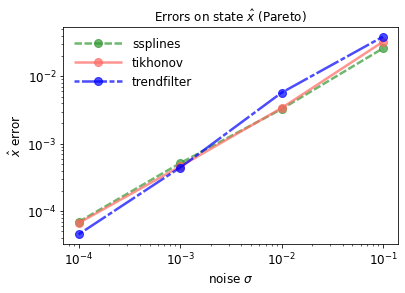

In [60]:
## GENERATE PLOTS --> ERRORS ON STATES
plt.close('all')
fig, ax = plt.subplots()

for j,filtr in enumerate(filter_methods):

    alphaVal = 0.7
    linethick = 2.5

    ax.plot(noise_lvls,
             mean_X_error[:,j],
             color=colourWheel[j%len(colourWheel)],
             linestyle = '-',
             marker = 'o',
             markersize=8,
             dashes=dashesStyles[j%len(dashesStyles)],
             lw=linethick,
             label=filter_methods[j].lower(),
             alpha=alphaVal)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(f"$\hat{{x}}$ error", size = 12)
ax.set_xlabel("noise $\sigma$", size = 12)
ax.legend(frameon=False, loc='upper left',ncol=1,handlelength=2)
ax.tick_params(labelsize = 12)
ax.yaxis.tick_left()
nameOfPlot = f'Errors on state $\hat{{x}}$ (Pareto)'
ax.set_title(nameOfPlot, size = 12)
ax.legend(frameon=False, loc='upper left',ncol=1,handlelength=4, fontsize = 12)
filename = f'filter_comparison_state_x_error_pareto.svg'
fig.savefig(filename, format='svg', dpi=600)
plt.show()

    
    


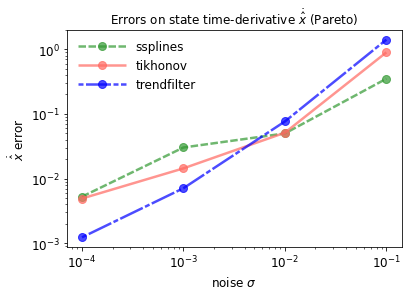

In [61]:
## GENERATE PLOTS --> ERRORS ON DERIVATIVES
plt.close('all')
fig, ax = plt.subplots()

for j,filtr in enumerate(filter_methods):

    alphaVal = 0.7
    linethick = 2.5

    ax.plot(noise_lvls,
             mean_dX_error[:,j],
             color=colourWheel[j%len(colourWheel)],
             linestyle = '-',
             marker = 'o',
             markersize=8,
             dashes=dashesStyles[j%len(dashesStyles)],
             lw=linethick,
             label=filter_methods[j].lower(),
             alpha=alphaVal)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(f"$\dot{{\hat{{x}}}}$ error", size = 12)
ax.set_xlabel("noise $\sigma$", size = 12)
ax.legend(frameon=False, loc='upper left',ncol=1,handlelength=2)
ax.tick_params(labelsize = 12)
ax.yaxis.tick_left()
nameOfPlot = f'Errors on state time-derivative $\dot{{\hat{{x}}}}$ (Pareto)'
ax.set_title(nameOfPlot, size = 12)
ax.legend(frameon=False, loc='upper left',ncol=1,handlelength=4, fontsize = 12)
filename = f'filter_comparison_state_dx_error_pareto.svg'
fig.savefig(filename, format='svg', dpi=600)
plt.show()